In [27]:
import numpy as np

from keras.models import Sequential  # class
from keras.models import load_model  # model 사용
from keras.layers import Dense       # 전결합

import matplotlib.pyplot as plt

In [28]:
# 데이터, 10행 2열
x_train = []
for i in range(1, 101, 1):  # 1 ~ 100
    x_train.append([i, 10]) # 1차원 배열 list에 list 추가: 2차원 배열
    # print(i)
x_train = np.array(x_train) # list를 ndarray로 변환    
print(x_train[0:5])  # 5행만 출력
print(x_train.shape) # 100행 2열

[[ 1 10]
 [ 2 10]
 [ 3 10]
 [ 4 10]
 [ 5 10]]
(100, 2)


In [29]:
y_train = []  # 실제값 저장용 list
for i in range(len(x_train)):
    val = (x_train[i][0] * x_train[i][1]) / 2 + 5 * 3 - 7 # 다양한 수식을 적용
    y_train.append([val]) # 각행의 0열과 1열을 곱함
    
y_train = np.array(y_train)  # list -> ndarray  
print(y_train[0:5])
print(y_train.shape)

[[13.]
 [18.]
 [23.]
 [28.]
 [33.]]
(100, 1)


In [30]:
# 두개의 은닉층을 사용하는 경우
model = Sequential()

# 입력값: 2 개
# 출력 노드 갯수: 10개
# 활성화 함수: linear

# 첫번째 은닉층(입력층은 선언 안함)
# model.add(Dense(10, input_shape=(2, ), activation='linear'))  
model.add(Dense(10, input_dim=2, activation='linear'))  
# 두번째 은닉층(출력층)
model.add(Dense(1))  # 선형회귀는 알고리즘을 적용하지 않고 바로 출력
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_split=0.2, 
                 epochs=100, batch_size=1)

Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 0s 5ms/step - loss: 56451.2110 - acc: 0.0000e+00 - val_loss: 195431.6094 - val_acc: 0.0000e+00
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 46026.8977 - acc: 0.0125 - val_loss: 158836.9816 - val_acc: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 35899.4949 - acc: 0.0000e+00 - val_loss: 123916.1559 - val_acc: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 26582.2379 - acc: 0.0000e+00 - val_loss: 90007.5109 - val_acc: 0.0000e+00
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 18312.1547 - acc: 0.0000e+00 - val_loss: 62737.8893 - val_acc: 0.0000e+00
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 11712.6952 - acc: 0.0000e+00 - val_loss: 40497.2517 - val_acc: 0.0000e+00
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 68

Epoch 59/100
80/80 [==============================] - 0s 1ms/step - loss: 1.8161 - acc: 0.2625 - val_loss: 5.2852 - val_acc: 0.0000e+00
Epoch 60/100
80/80 [==============================] - 0s 1ms/step - loss: 1.3966 - acc: 0.3000 - val_loss: 2.5876 - val_acc: 0.0000e+00
Epoch 61/100
80/80 [==============================] - 0s 1ms/step - loss: 1.0524 - acc: 0.3500 - val_loss: 2.6556 - val_acc: 0.0000e+00
Epoch 62/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7745 - acc: 0.3625 - val_loss: 1.2118 - val_acc: 0.0000e+00
Epoch 63/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5649 - acc: 0.4125 - val_loss: 1.0293 - val_acc: 0.0000e+00
Epoch 64/100
80/80 [==============================] - 0s 1ms/step - loss: 0.4163 - acc: 0.5000 - val_loss: 0.5644 - val_acc: 0.0000e+00
Epoch 65/100
80/80 [==============================] - 0s 1ms/step - loss: 0.2874 - acc: 0.6250 - val_loss: 0.8545 - val_acc: 0.0000e+00
Epoch 66/100
80/80 [============================

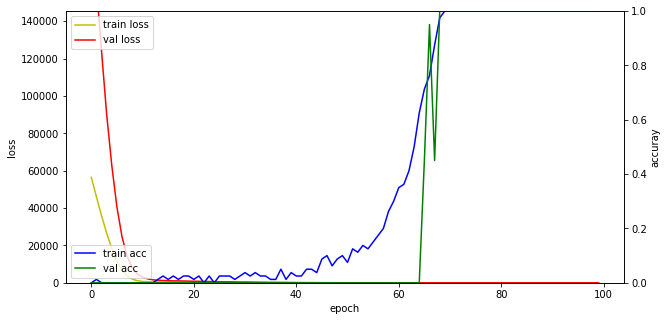

In [31]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 오차
loss_ax.set_ylim([0.0, 145504.0]) # 값을 반영하여 변경, 왼쪽 y 축

acc_ax.plot(hist.history['acc'], 'b', label='train acc')   # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])    # 오른쪽 y 축

loss_ax.set_xlabel('epoch')    # x축 레이블
loss_ax.set_ylabel('loss')     # 오차 레이블, 왼쪽 y 축
acc_ax.set_ylabel('accuray')   # 정확도 레이블, 오른쪽 y 축

loss_ax.legend(loc='upper left') # 오차 레이블 출력 위치
acc_ax.legend(loc='lower left')  # 정확도 레입르 출력 위치

plt.show()

In [32]:
model.save('./Basic2.h5')

In [33]:
# 모델 사용
model = load_model('./Basic2.h5')

x_use = np.array([[6, 10], [7, 10], [8, 10], [9, 10], [10, 10]])
y_predict = model.predict(x_use) # 모델 사용

y_use = np.array([38, 43, 48, 53, 58]) # 실제값
for i in range(len(x_use)):
    # print('실제값: {0}, 예측값: {1}'.format(y_use[i], y_predict[i]))
    print(y_predict[i]) # 1차원 배열
    print('실제값: {0}, 예측값: {1:.0f}'.format(y_use[i], y_predict[i][0]))


[38.00005]
실제값: 38, 예측값: 38
[43.00005]
실제값: 43, 예측값: 43
[48.000046]
실제값: 48, 예측값: 48
[53.00005]
실제값: 53, 예측값: 53
[58.000042]
실제값: 58, 예측값: 58


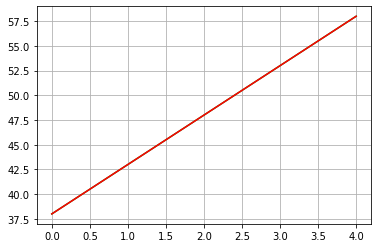

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(y_use, color='g')
plt.plot(y_predict, color='r')
plt.grid(True)  # 그리드 출력
plt.show()